In [67]:
import math
import warnings
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [68]:
df = pd.read_csv('/content/globalterrorismdb_0718dist.csv',encoding='ISO-8859-1')

In [69]:
df.head().iloc[:,100:]

,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [70]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [71]:
df.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [72]:
df.shape

(181691, 135)

In [73]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [74]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


**Data Preprocessing**

In [76]:
null_sum=(df.isnull().sum()/len(df))*100
percent_null=null_sum.sort_values(ascending=False)
type(percent_null)
high_null_column=percent_null[percent_null>=50]
less_than_50_null_column=percent_null[~percent_null.isin(high_null_column)]
print(f'Number of column where null value less than fifty percent {len(less_than_50_null_column)}')
less_null_column=less_than_50_null_column.index.to_list()
print(less_null_column)

Number of column where null value less than fifty percent 58
['nperps', 'nperpcap', 'nwoundte', 'weapdetail', 'nkillter', 'scite1', 'summary', 'claimed', 'nwoundus', 'nkillus', 'corp1', 'weapsubtype1', 'weapsubtype1_txt', 'nwound', 'targsubtype1', 'targsubtype1_txt', 'nkill', 'longitude', 'latitude', 'natlty1', 'natlty1_txt', 'target1', 'city', 'provstate', 'guncertain1', 'ishostkid', 'specificity', 'doubtterr', 'multiple', 'crit1', 'iyear', 'iday', 'imonth', 'targtype1_txt', 'gname', 'individual', 'dbsource', 'country', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY', 'extended', 'region_txt', 'country_txt', 'region', 'crit2', 'targtype1', 'weaptype1', 'weaptype1_txt', 'attacktype1_txt', 'attacktype1', 'vicinity', 'suicide', 'success', 'crit3', 'property', 'eventid']


In [77]:
new_df=df[less_null_column]

In [78]:
check=new_df.columns.to_list()

In [79]:
selected_columns_1=['eventid', 'iyear', 'imonth', 'iday','country_txt','region_txt','city','multiple', 'success', 'suicide', 
 'attacktype1_txt', 'targtype1_txt',  'targsubtype1_txt', 'corp1', 'target1', 'natlty1_txt', 'weaptype1_txt','nkill','nwoundus', 'claimed', 'individual', 'INT_LOG', 'doubtterr']

In [80]:
len(check)-len(selected_columns_1)

35

In [81]:
print(list((set(check)) - (set(selected_columns_1))))

['crit1', 'guncertain1', 'dbsource', 'nkillus', 'targsubtype1', 'ishostkid', 'longitude', 'attacktype1', 'provstate', 'vicinity', 'summary', 'specificity', 'INT_IDEO', 'gname', 'natlty1', 'crit3', 'INT_ANY', 'country', 'nkillter', 'region', 'nwoundte', 'crit2', 'weapsubtype1', 'scite1', 'weaptype1', 'nperpcap', 'weapsubtype1_txt', 'property', 'nwound', 'latitude', 'nperps', 'weapdetail', 'targtype1', 'extended', 'INT_MISC']


In [82]:
df_1=df[selected_columns_1]

In [83]:
df_1.T

,0,1,2,3,4,5,6,7,8,9,...,181681,181682,181683,181684,181685,181686,181687,181688,181689,181690
eventid,197000000001,197000000002,197001000001,197001000002,197001000003,197001010002,197001020001,197001020002,197001020003,197001030001,...,201712310016,201712310017,201712310018,201712310019,201712310020,201712310022,201712310029,201712310030,201712310031,201712310032
iyear,1970,1970,1970,1970,1970,1970,1970,1970,1970,1970,...,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017
imonth,7,0,1,1,1,1,1,1,1,1,...,12,12,12,12,12,12,12,12,12,12
iday,2,0,0,0,0,1,2,2,2,3,...,31,31,31,31,31,31,31,31,31,31
country_txt,Dominican Republic,Mexico,Philippines,Greece,Japan,United States,Uruguay,United States,United States,United States,...,Philippines,Italy,Afghanistan,India,Afghanistan,Somalia,Syria,Philippines,India,Philippines
region_txt,Central America & Caribbean,North America,Southeast Asia,Western Europe,East Asia,North America,South America,North America,North America,North America,...,Southeast Asia,Western Europe,South Asia,South Asia,South Asia,Sub-Saharan Africa,Middle East & North Africa,Southeast Asia,South Asia,Southeast Asia
city,Santo Domingo,Mexico city,Unknown,Athens,Fukouka,Cairo,Montevideo,Oakland,Madison,Madison,...,Shariff Aguak,Spinetoli,Kohistan district,Hungrum,Maymana,Ceelka Geelow,Jableh,Kubentog,Imphal,Cotabato City
multiple,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
success,1,1,1,1,1,1,0,1,1,1,...,1,1,1,1,1,1,1,1,0,0
suicide,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
(df_1.isnull().sum()/len(df_1))*100

eventid              0.000000
iyear                0.000000
imonth               0.000000
iday                 0.000000
country_txt          0.000000
region_txt           0.000000
city                 0.238867
multiple             0.000550
success              0.000000
suicide              0.000000
attacktype1_txt      0.000000
targtype1_txt        0.000000
targsubtype1_txt     5.709144
corp1               23.418882
target1              0.350045
natlty1_txt          0.858050
weaptype1_txt        0.000000
nkill                5.676120
nwoundus            35.611010
claimed             36.391456
individual           0.000000
INT_LOG              0.000000
doubtterr            0.000550
dtype: float64

In [85]:
df_1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   eventid           181691 non-null  int64  
 1   iyear             181691 non-null  int64  
 2   imonth            181691 non-null  int64  
 3   iday              181691 non-null  int64  
 4   country_txt       181691 non-null  object 
 5   region_txt        181691 non-null  object 
 6   city              181257 non-null  object 
 7   multiple          181690 non-null  float64
 8   success           181691 non-null  int64  
 9   suicide           181691 non-null  int64  
 10  attacktype1_txt   181691 non-null  object 
 11  targtype1_txt     181691 non-null  object 
 12  targsubtype1_txt  171318 non-null  object 
 13  corp1             139141 non-null  object 
 14  target1           181055 non-null  object 
 15  natlty1_txt       180132 non-null  object 
 16  weaptype1_txt     18

In [86]:
print("Country with the most attacks:",df['country'].value_counts().idxmax())
print("City with the most attacks:",df['city'].value_counts().index[1]) #as first entry is 'unknown'
print("Region with the most attacks:",df['region'].value_counts().idxmax())
print("Year with the most attacks:",df['iyear'].value_counts().idxmax())
print("Month with the most attacks:",df['imonth'].value_counts().idxmax())
print("Most Extended:",df['extended'].value_counts().idxmax())

Country with the most attacks: 95
City with the most attacks: Baghdad
Region with the most attacks: 10
Year with the most attacks: 2014
Month with the most attacks: 5
Most Extended: 0


**Exploratory Data Analysis**


In [87]:
attack_per_year=df_1['iyear'].value_counts()

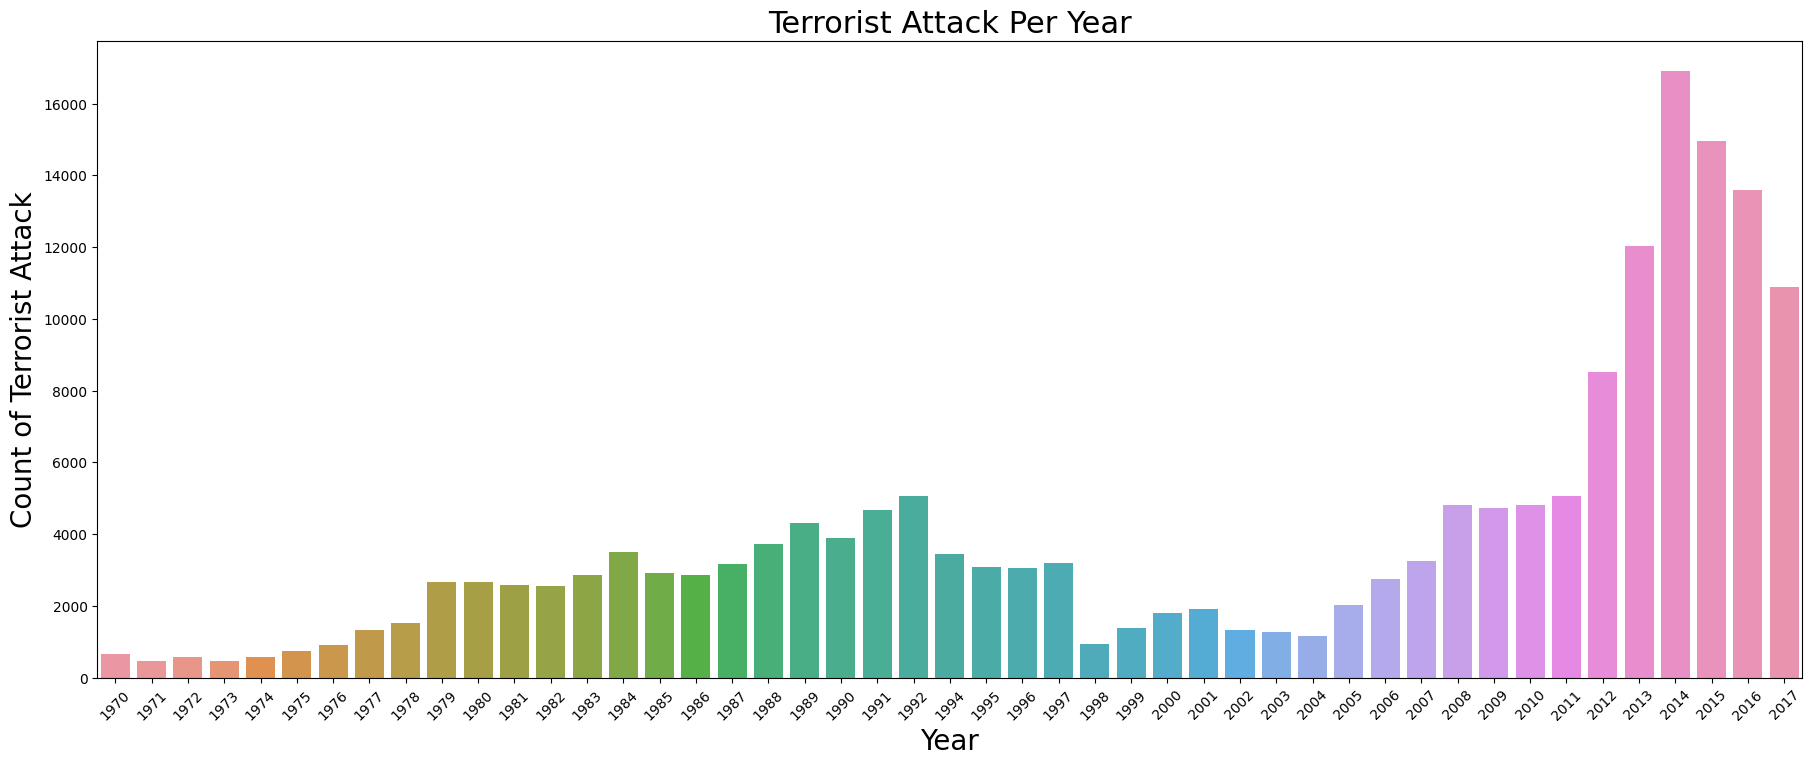

In [88]:
ax=plt.rcParams['figure.figsize'] = 22,8.27
ax=sns.countplot(x='iyear',data=df_1)
ax.set_xlabel('Year',fontsize=20)
plt.xticks(rotation = 45)
ax.set_ylabel('Count of Terrorist Attack',fontsize=20)
ax.set_title('Terrorist Attack Per Year',fontsize=22);

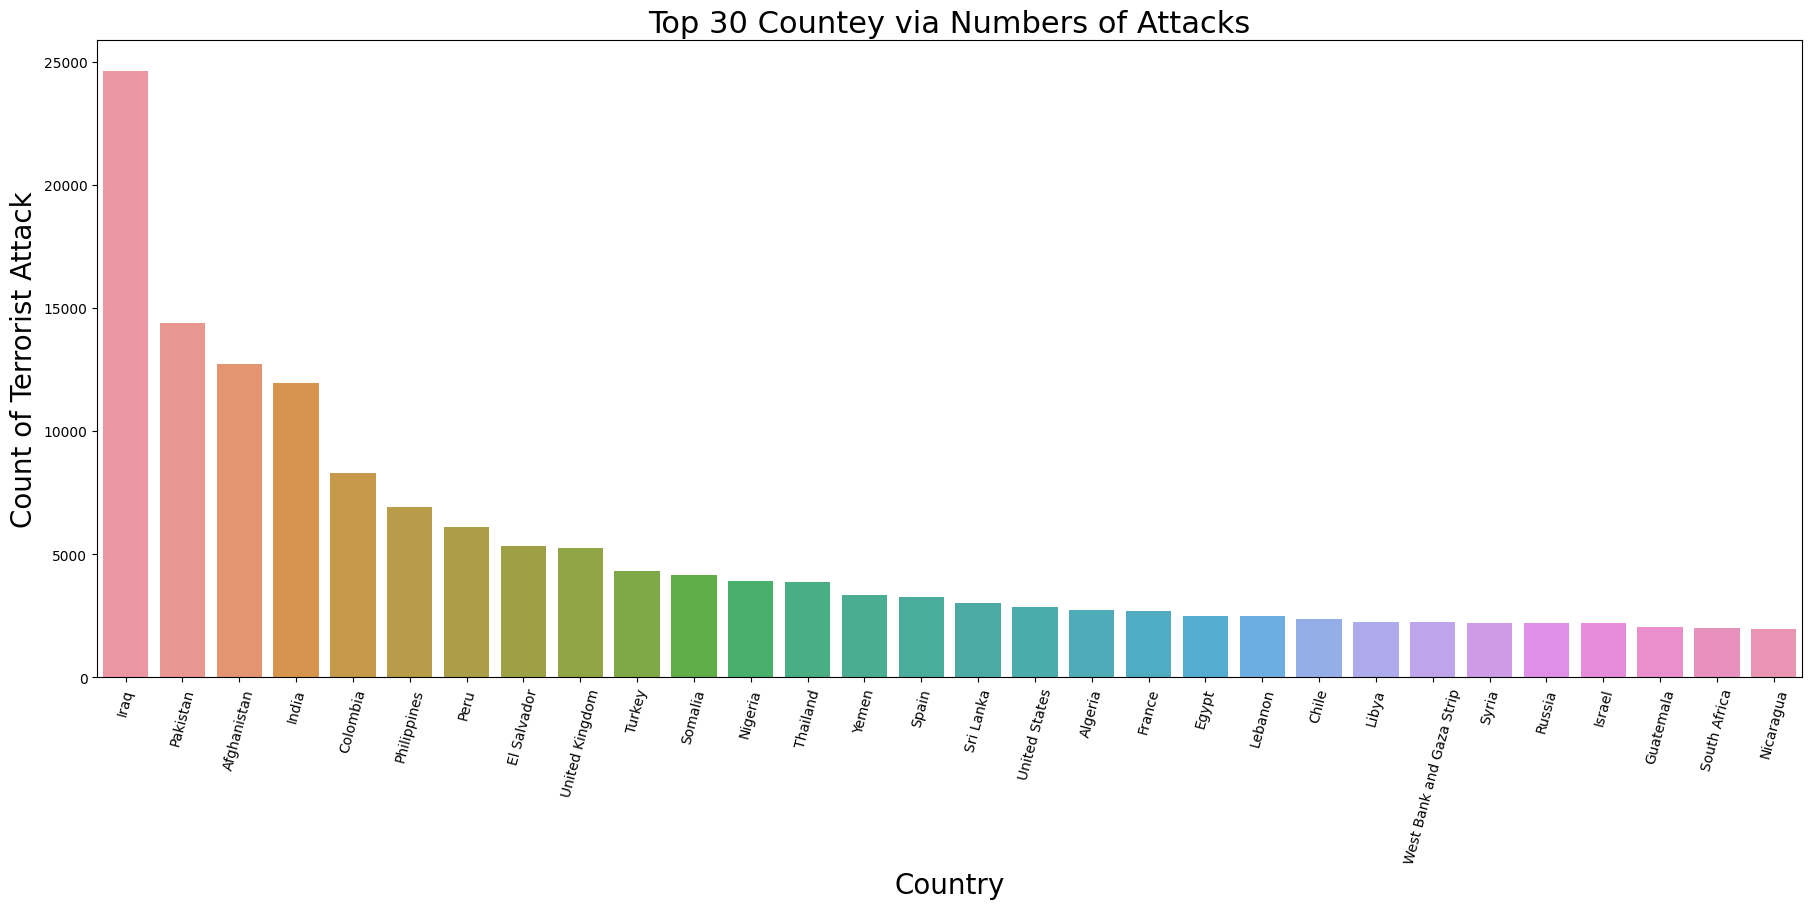

In [89]:
ax=plt.rcParams['figure.figsize'] = 22,8.27
ax=sns.countplot(x='country_txt',data=df_1,order = df_1['country_txt'].value_counts().index[:30])
ax.set_xlabel('Country',fontsize=20)
plt.xticks(rotation = 75)
ax.set_ylabel('Count of Terrorist Attack',fontsize=20)
ax.set_title('Top 30 Countey via Numbers of Attacks',fontsize=22);

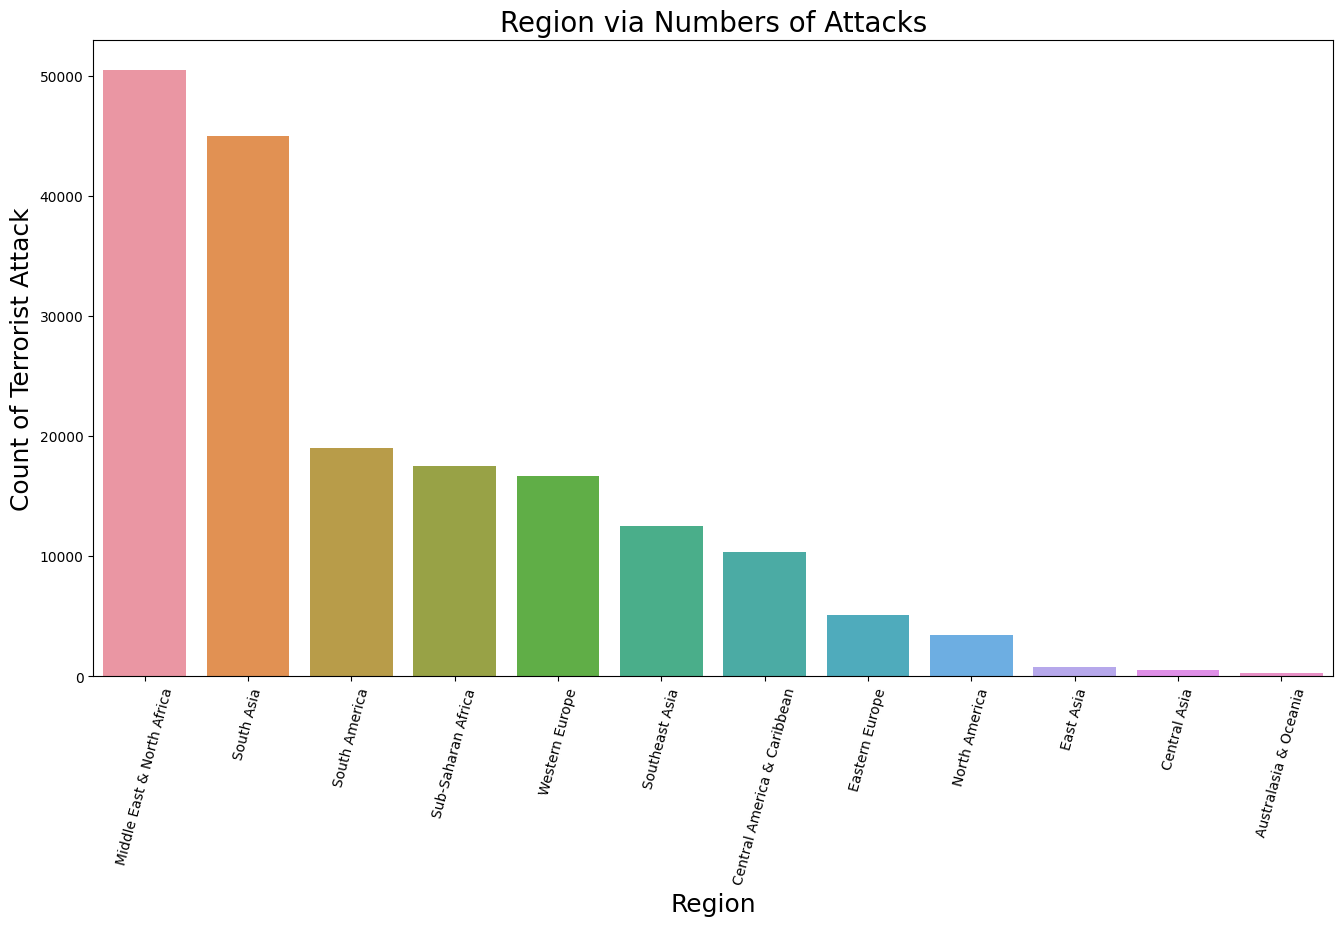

In [90]:
ax=plt.rcParams['figure.figsize'] = 16,8.27
ax=sns.countplot(x='region_txt',data=df_1,order = df_1['region_txt'].value_counts().index)
ax.set_xlabel('Region',fontsize=18)
plt.xticks(rotation = 75)
ax.set_ylabel('Count of Terrorist Attack',fontsize=18)
ax.set_title('Region via Numbers of Attacks',fontsize=20);

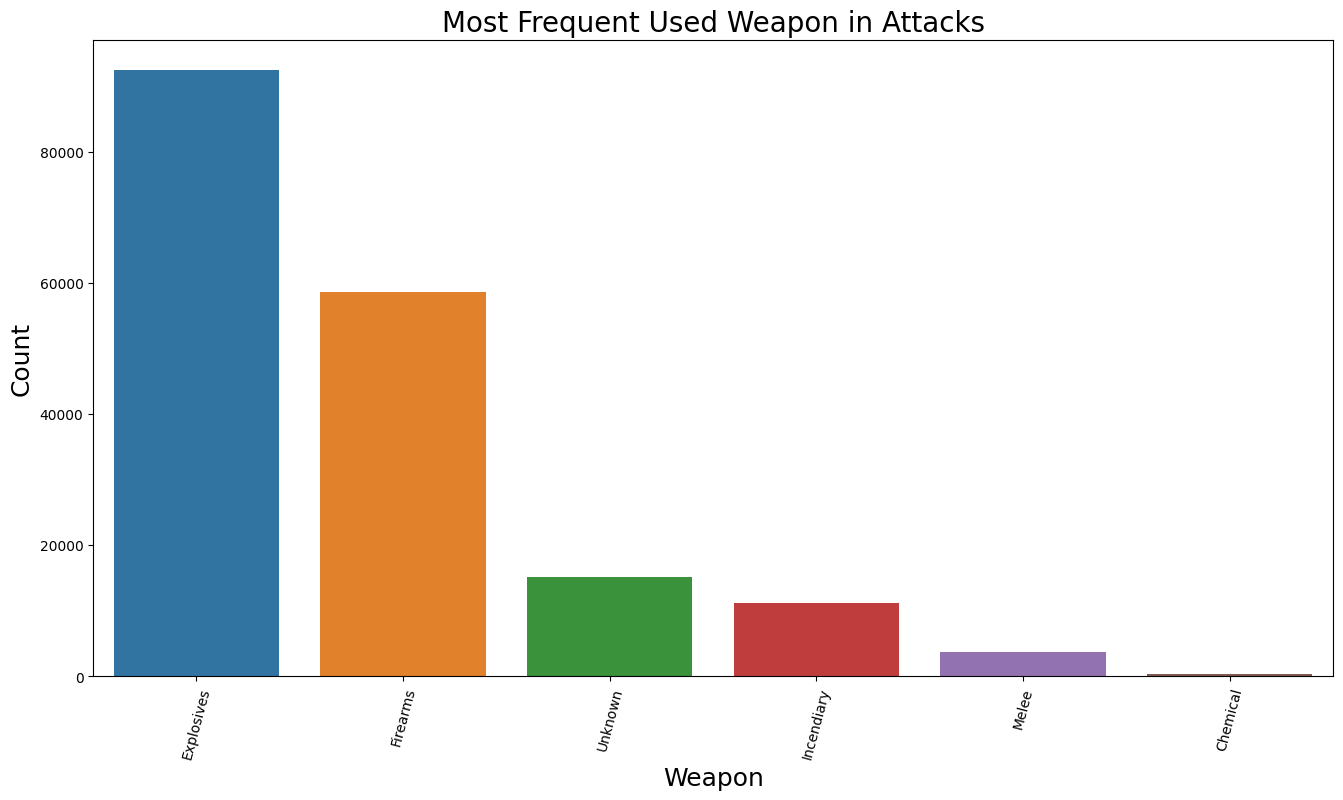

In [91]:
ax=plt.rcParams['figure.figsize'] = 16,8.27
ax=sns.countplot(x='weaptype1_txt',data=df_1,order = df_1['weaptype1_txt'].value_counts().index[:6])
ax.set_xlabel('Weapon',fontsize=18)
plt.xticks(rotation = 75)
ax.set_ylabel('Count',fontsize=18)
ax.set_title('Most Frequent Used Weapon in Attacks',fontsize=20);

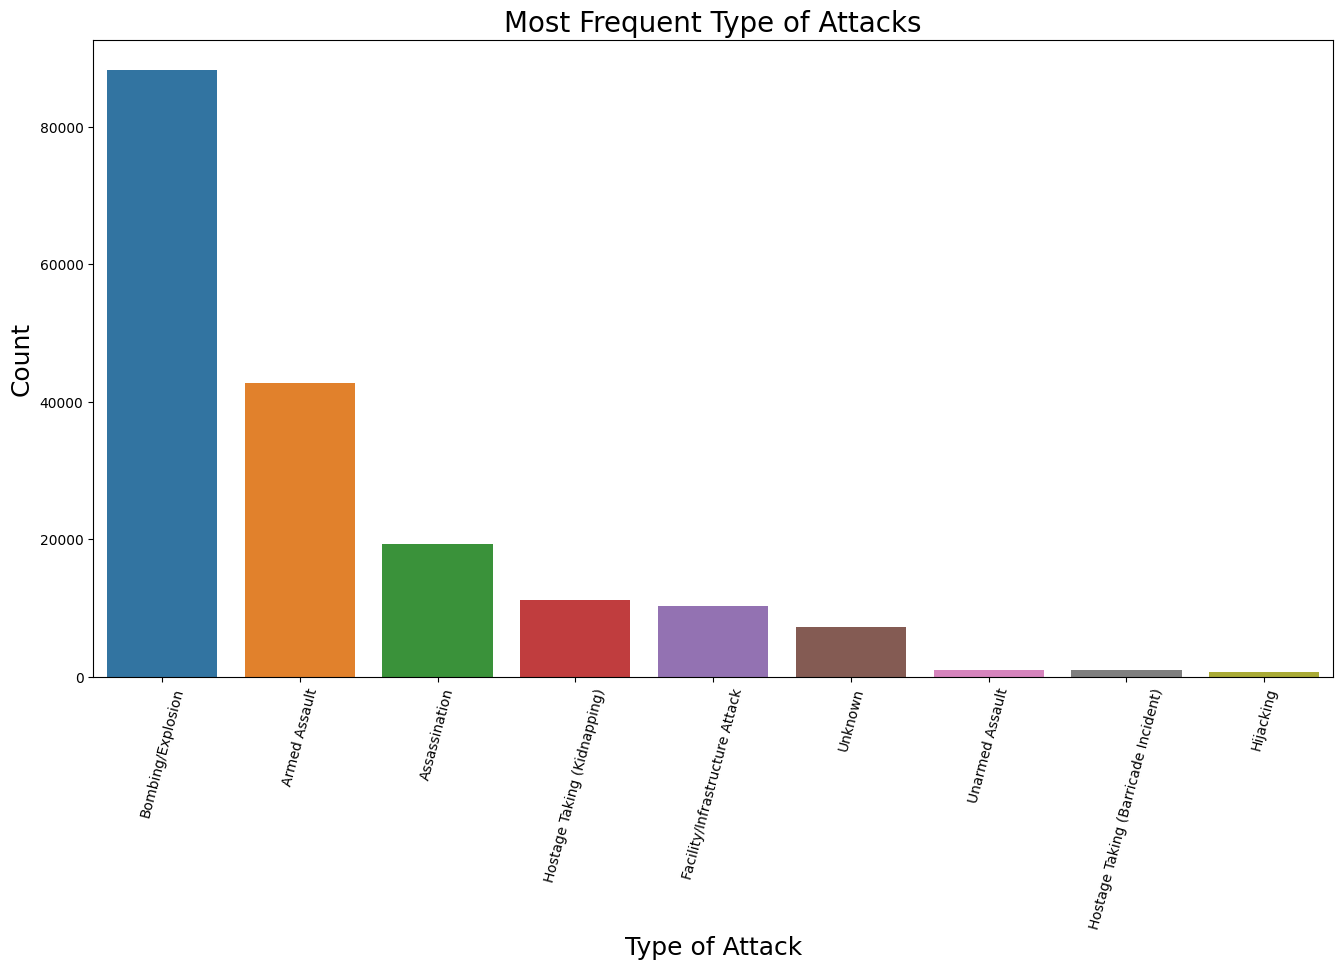

In [92]:
ax=plt.rcParams['figure.figsize'] = 16,8.27
ax=sns.countplot(x='attacktype1_txt',data=df_1,order = df_1['attacktype1_txt'].value_counts().index)
ax.set_xlabel('Type of Attack',fontsize=18)
plt.xticks(rotation = 75)
ax.set_ylabel('Count',fontsize=18)
ax.set_title('Most Frequent Type of Attacks',fontsize=20);


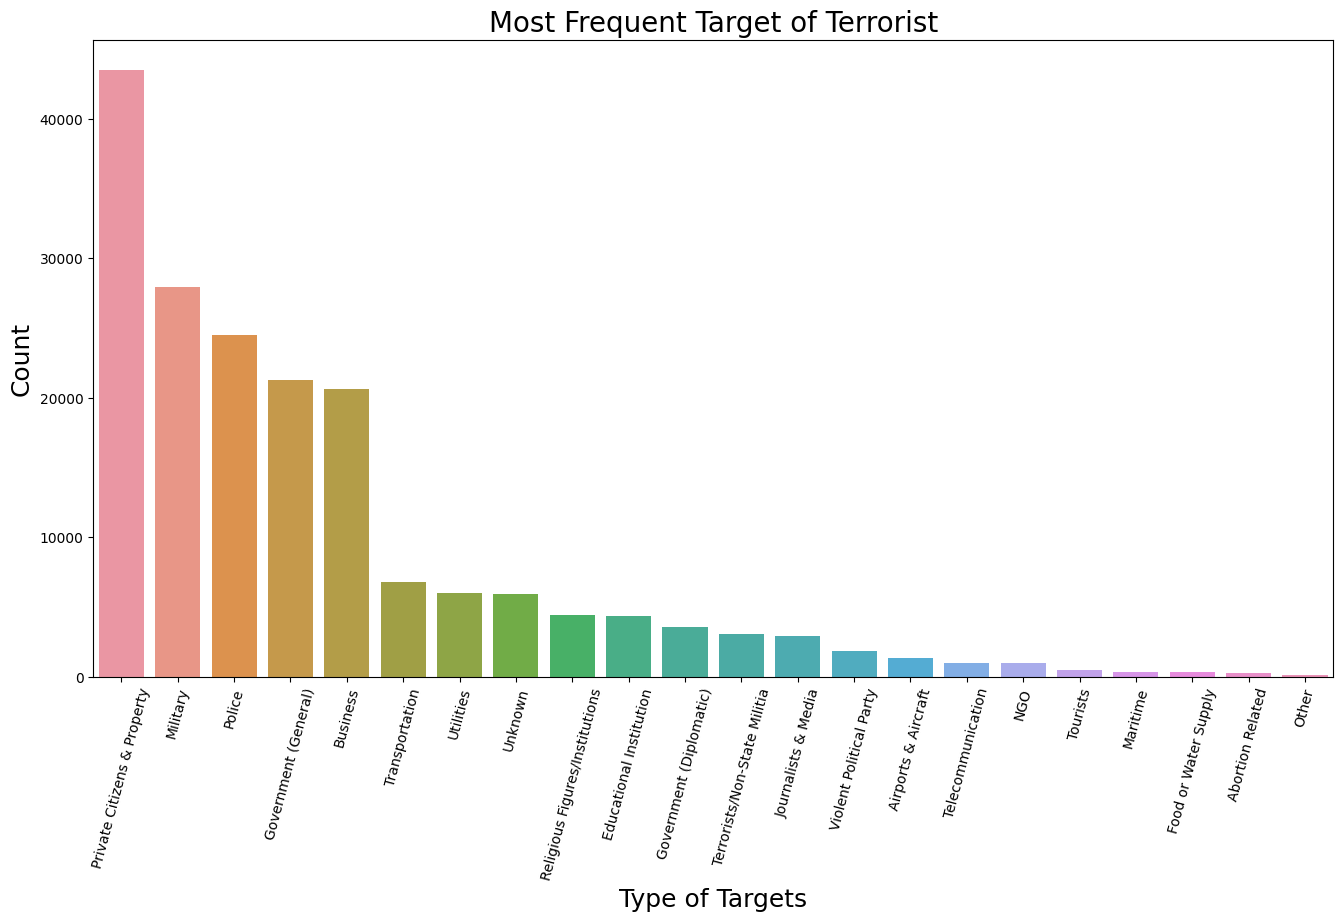

In [93]:
ax=plt.rcParams['figure.figsize'] = 16,8.27
ax=sns.countplot(x='targtype1_txt',data=df_1,order = df_1['targtype1_txt'].value_counts().index)
ax.set_xlabel('Type of Targets',fontsize=18)
plt.xticks(rotation = 75)
ax.set_ylabel('Count',fontsize=18)
ax.set_title('Most Frequent Target of Terrorist',fontsize=20);

In [94]:
print('\n')
print(('*')*20)
print('Value count of Object Type Category which if greater than 50')
print('\n')
print(('*')*20)
cat_col=df_1.select_dtypes('object').columns.to_list()
for col in cat_col:
  if len(df_1[col].value_counts())<50:
    print(df_1[col].value_counts())
    print('\n')
    print(('*')*20)
 




********************
Value count of Object Type Category which if greater than 50


********************
Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: region_txt, dtype: int64


********************
Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                          

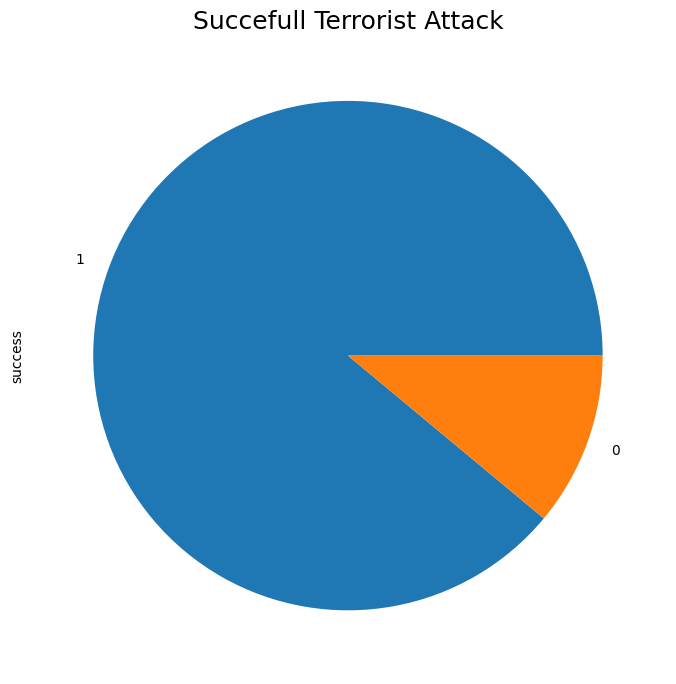

In [95]:
ax=df_1['success'].value_counts().plot(kind='pie')
ax.set_title('Succefull Terrorist Attack',fontsize=18);

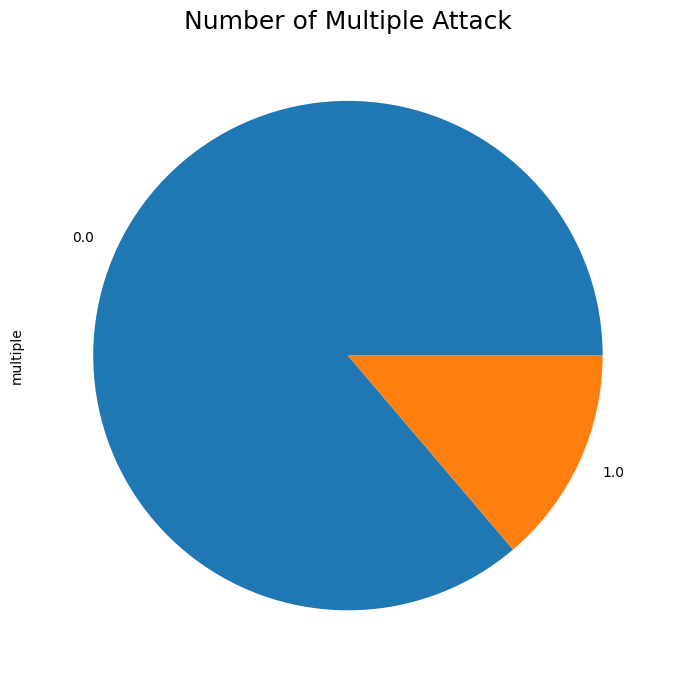

In [96]:
ax=df_1['multiple'].value_counts().plot(kind='pie')
ax.set_title('Number of Multiple Attack',fontsize=18);

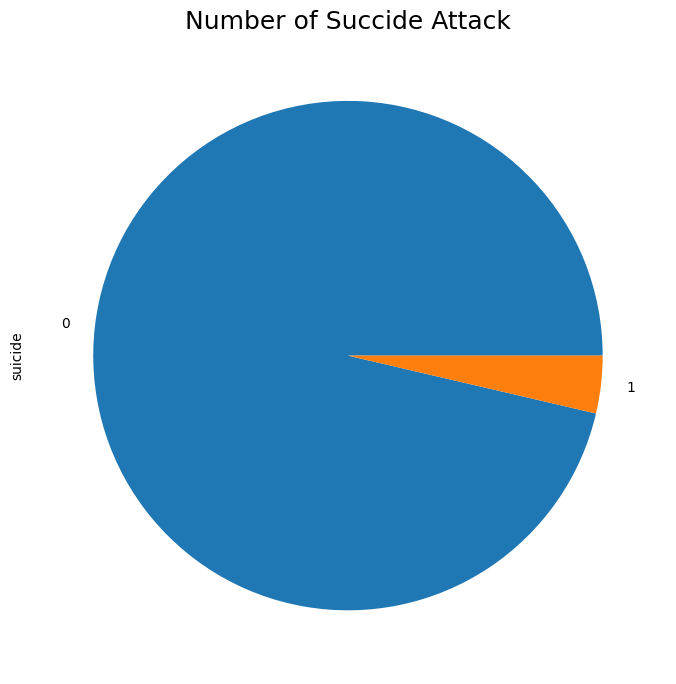

In [97]:
ax=df_1['suicide'].value_counts().plot(kind='pie')
ax.set_title('Number of Succide Attack',fontsize=18);

**Countries Perfmance Against Terrorist Atatcks**

In [98]:
suceess_country=df_1.groupby('country_txt').agg({'eventid':'count','success':'sum'}).reset_index()
suceess_country.columns=['Country','Total_Attacks','Attack_Success']
suceess_country['Attack_Failed']=suceess_country['Total_Attacks']-suceess_country['Attack_Success']
suceess_country['Failure_Rate_Attack']=(suceess_country['Attack_Failed']/suceess_country['Total_Attacks'])*100
suceess_country['Success_Rate_Attack']=(suceess_country['Attack_Success']/suceess_country['Total_Attacks'])*100
suceess_country=suceess_country.round(2)

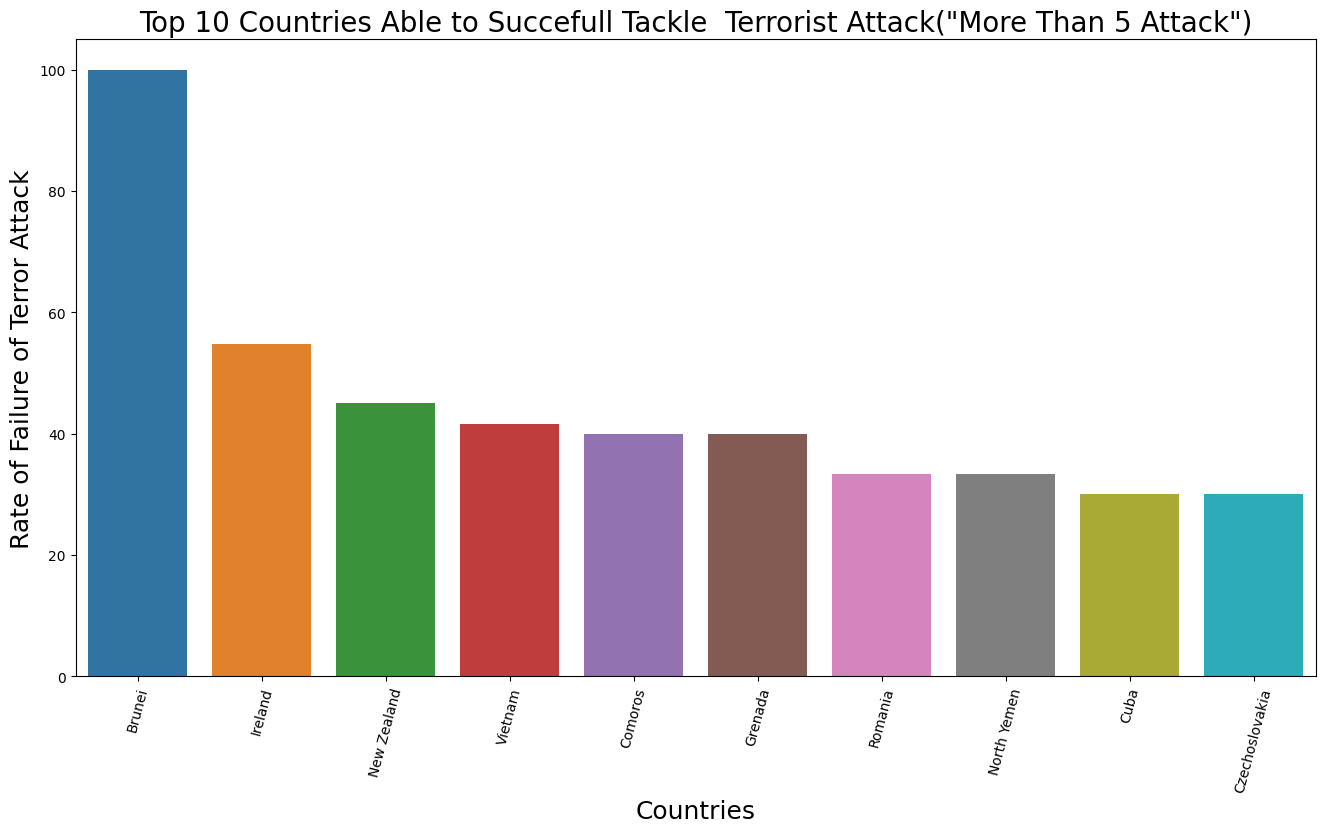

In [99]:
able_stop_terror_attack=suceess_country[suceess_country['Total_Attacks']>=5].sort_values('Failure_Rate_Attack',ascending=False )[:10]
plot_able_stop_terror_attack=able_stop_terror_attack.loc[:,['Country','Failure_Rate_Attack']]
ax=plt.rcParams['figure.figsize'] = 16,8.27
ax=sns.barplot(x='Country',y='Failure_Rate_Attack',data=plot_able_stop_terror_attack)
ax.set_xlabel('Countries',fontsize=18)
plt.xticks(rotation = 75)
ax.set_ylabel('Rate of Failure of Terror Attack',fontsize=18)
ax.set_title('Top 10 Countries Able to Succefull Tackle  Terrorist Attack("More Than 5 Attack")',fontsize=20);

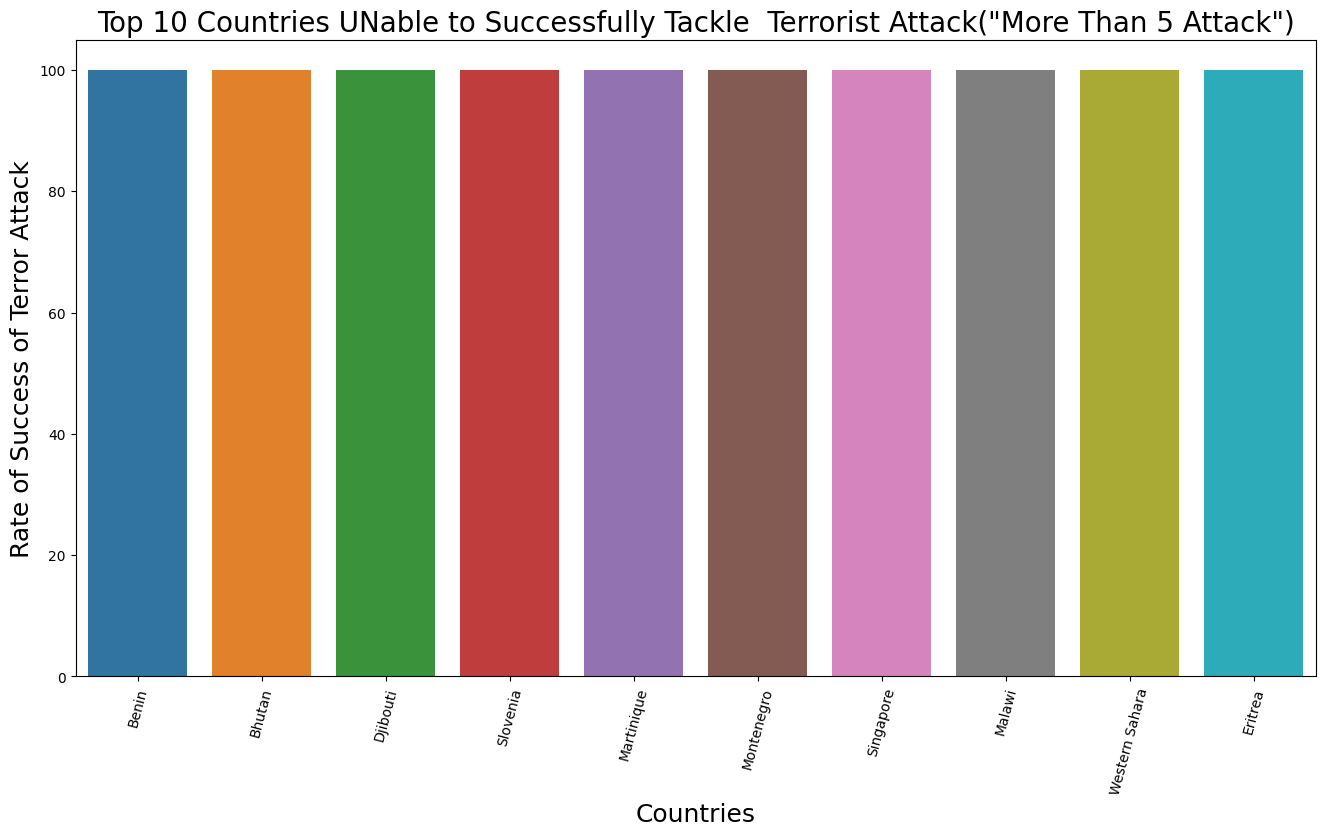

In [100]:
unable_stop_terror_attack=suceess_country[suceess_country['Total_Attacks']>=5].sort_values('Success_Rate_Attack',ascending=False )[:10]
plot_unable_stop_terror_attack=unable_stop_terror_attack.loc[:,['Country','Success_Rate_Attack','Total_Attacks']]
ax=plt.rcParams['figure.figsize'] = 16,8.27
ax=sns.barplot(x='Country',y='Success_Rate_Attack',data=plot_unable_stop_terror_attack)
ax.set_xlabel('Countries',fontsize=18)
plt.xticks(rotation = 75)
ax.set_ylabel('Rate of Success of Terror Attack',fontsize=18)
ax.set_title('Top 10 Countries UNable to Successfully Tackle  Terrorist Attack("More Than 5 Attack")',fontsize=20);

**Performing World Cloud**

In [101]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

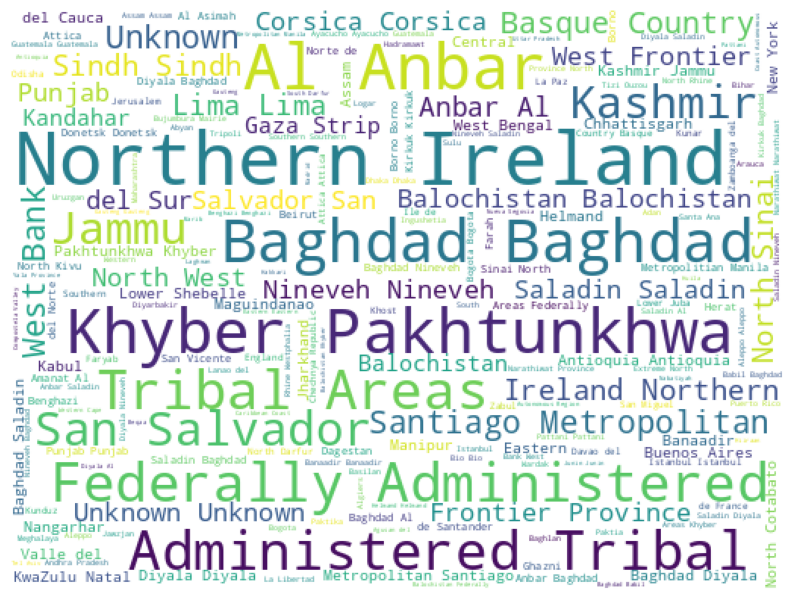

In [102]:
from wordcloud import WordCloud
from scipy import signal
cities = df.state.dropna(False)
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(background_color = 'white',
                     width = 512,
                     height = 384).generate(' '.join(cities))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()